In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import gzip
import requests
import io
import os
from pyspark.sql import SparkSession
import pyspark.pandas as ps
import pyarrow
from data_processing import load_data

In [2]:
spark = SparkSession.builder.getOrCreate()

24/04/13 15:10:25 WARN Utils: Your hostname, Zachs-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 10.0.0.94 instead (on interface en0)
24/04/13 15:10:25 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/13 15:10:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/04/13 15:10:28 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
authors_path = '/Users/zachbecker/goodreads_book_authors.json.gz'
genres_path = '/Users/zachbecker/goodreads_book_genres_initial.json.gz'
interactions_path = '/Users/zachbecker/goodreads_interactions.csv'
reviews_path = '/Users/zachbecker/goodreads_reviews_spoiler_raw.json.gz'
chunksize = 100000

In [6]:
authors_df = pd.read_json(gzip.open(authors_path), lines=True, chunksize=chunksize)
genres_df = pd.read_json(gzip.open(genres_path), lines=True, chunksize=chunksize)
reviews_df = pd.read_json(gzip.open(reviews_path), lines=True, chunksize=chunksize)
interactions_df = pd.read_csv(interactions_path, chunksize=chunksize)

In [8]:
for chunk in authors_df:
    authors_chunk = chunk
    break

for chunk in genres_df:
    genres_chunk = chunk

for chunk in reviews_df:
    reviews_chunk = chunk
    break

for chunk in interactions_df:
    interactions_chunk = chunk
    break

In [20]:
authors_chunk.head()

,average_rating,author_id,text_reviews_count,name,ratings_count
0,3.98,604031,7,Ronald J. Fields,49
1,4.08,626222,28716,Anita Diamant,546796
2,3.92,10333,5075,Barbara Hambly,122118
3,3.68,9212,36262,Jennifer Weiner,888522
4,3.82,149918,96,Nigel Pennick,1740


In [21]:
genres_chunk.head()

,book_id,genres
2300000,968216,"{'fiction': 7, 'poetry': 1, 'young-adult': 1, ..."
2300001,19238114,"{'mystery, thriller, crime': 1}"
2300002,968214,{}
2300003,3400759,"{'fiction': 17771, 'mystery, thriller, crime':..."
2300004,22819037,{'poetry': 1}


In [22]:
reviews_chunk.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,,,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,,,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


In [23]:
interactions_chunk.head()

,user_id,book_id,is_read,rating,is_reviewed
0,0,948,1,5,0
1,0,947,1,5,1
2,0,946,1,5,0
3,0,945,1,5,0
4,0,944,1,5,0


In [29]:
books_clean = pd.read_csv("books_clean.csv")

In [38]:
books_clean.rename(columns={'Unnamed: 0': 'book_id'}, inplace=True)

In [39]:
books_clean.head()

,book_id,text_reviews_count,average_rating,num_pages,publication_year,ratings_count,"history, historical fiction, biography",fiction,"fantasy, paranormal","mystery, thriller, crime",poetry,romance,non-fiction,children,young-adult,"comics, graphic"
0,5333265,1,4.00,256,1984,3,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
1,1333909,6,3.23,256,2001,10,0.022321,0.977679,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
2,7327624,7,4.03,600,1987,140,0.000000,0.195122,0.756098,0.024390,0.02439,0.000000,0.0,0.0,0.0,0.0
3,6066819,3282,3.49,368,2009,51184,0.000000,0.943878,0.000000,0.017007,0.00000,0.039116,0.0,0.0,0.0,0.0
4,287140,5,3.40,256,2011,15,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.0,0.0,0.0


In [43]:
books_clean.shape

(1941978, 16)

In [42]:
books_clean.describe()

,book_id,text_reviews_count,average_rating,num_pages,publication_year,ratings_count,"history, historical fiction, biography",fiction,"fantasy, paranormal","mystery, thriller, crime",poetry,romance,non-fiction,children,young-adult,"comics, graphic"
count,1.941978e+06,1.941978e+06,1.941978e+06,1.941978e+06,1.941978e+06,1.941978e+06,1.941978e+06,1.941978e+06,1.941978e+06,1.941978e+06,1.941978e+06,1.941978e+06,1.941978e+06,1.941978e+06,1.941978e+06,1.941978e+06
mean,1.459718e+07,3.356502e+01,3.870227e+00,2.666063e+02,2.008398e+03,4.914203e+02,1.115109e-01,2.319829e-01,9.864633e-02,9.311972e-02,2.175752e-02,1.437514e-01,1.664703e-01,5.609450e-02,3.580916e-02,4.085726e-02
std,1.073162e+07,4.173660e+02,4.233933e-01,7.052622e+02,1.998502e+02,1.226420e+04,2.207618e-01,3.072664e-01,2.199221e-01,2.300033e-01,1.334851e-01,2.875392e-01,3.273815e-01,1.913051e-01,1.153184e-01,1.748337e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,-1.000000e+00,-2.000000e+00,-3.000000e+00,-2.000000e+00,-3.000000e+00,-1.000000e+00
25%,3.779662e+06,2.000000e+00,3.650000e+00,2.050000e+02,2.007000e+03,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.361609e+07,5.000000e+00,3.900000e+00,2.560000e+02,2.011000e+03,2.900000e+01,0.000000e+00,8.053691e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.335794e+07,1.400000e+01,4.130000e+00,3.040000e+02,2.013000e+03,1.030000e+02,1.103638e-01,3.636364e-01,2.604167e-02,9.686996e-03,0.000000e+00,9.756098e-02,5.555556e-02,0.000000e+00,0.000000e+00,0.000000e+00
max,3.652450e+07,1.426450e+05,5.000000e+00,9.450770e+05,6.553500e+04,4.899965e+06,4.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00


# EDA

In [53]:
import matplotlib.pyplot as plt

In [77]:
genre_columns = ['history, historical fiction, biography', 'fiction', 'fantasy, paranormal','mystery, thriller, crime', 
                 'poetry', 'romance', 'non-fiction', 'children', 'young-adult', 'comics, graphic']
genre_dist = books_clean[genre_columns].sum().sort_values(ascending=False)

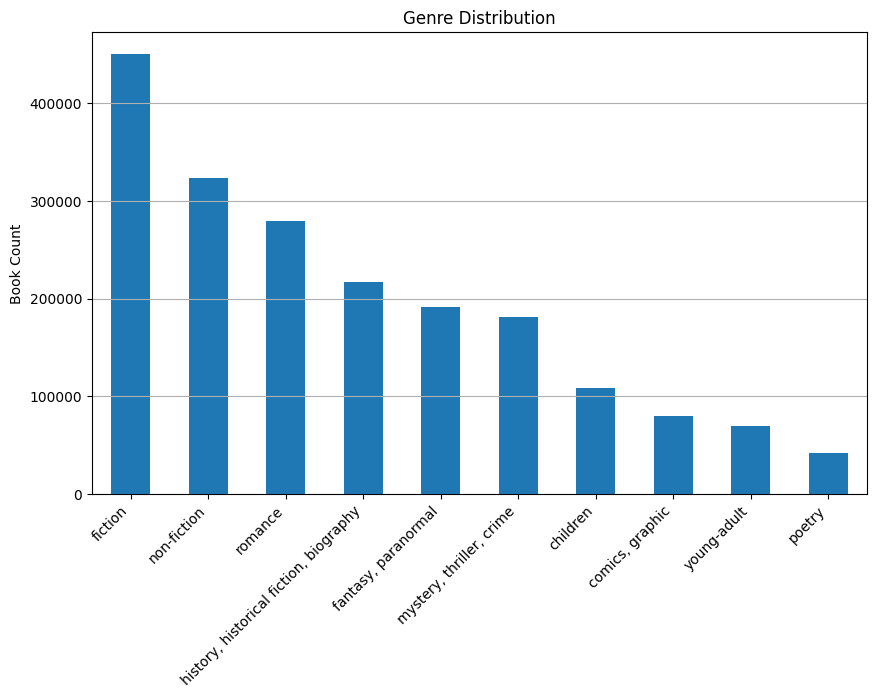

In [60]:
plt.figure(figsize=(10, 6))
genre_dist.plot(kind='bar', stacked=True)
plt.title('Genre Distribution')
plt.ylabel('Book Count')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [46]:
for genre in genre_columns:
    average_rating = books_clean.groupby(genre)['average_rating'].mean()
    print(f"Average rating for {genre}: {average_rating}")

Average rating for history, historical fiction, biography: history, historical fiction, biography
-2.000000    3.570000
-1.000000    3.923509
-0.666667    4.166667
-0.500000    3.862946
-0.428571    3.560000
               ...   
 1.500000    3.765000
 1.666667    3.560000
 2.000000    3.855588
 3.000000    4.200000
 4.000000    4.830000
Name: average_rating, Length: 27521, dtype: float64
Average rating for fiction: fiction
0.000000    3.888539
0.001366    4.470000
0.001605    3.860000
0.001792    4.290000
0.001828    3.810000
              ...   
0.995222    3.970000
0.995227    3.780000
0.995232    3.780000
0.995708    3.690000
1.000000    3.752395
Name: average_rating, Length: 44988, dtype: float64
Average rating for fantasy, paranormal: fantasy, paranormal
-2.000000    4.360000
-1.000000    3.835072
-0.666667    3.888750
-0.600000    3.270000
-0.500000    3.768136
               ...   
 1.250000    3.950000
 1.333333    3.895455
 1.500000    3.683684
 1.666667    2.860000
 2.000000

<Axes: xlabel='text_reviews_count', ylabel='average_rating'>

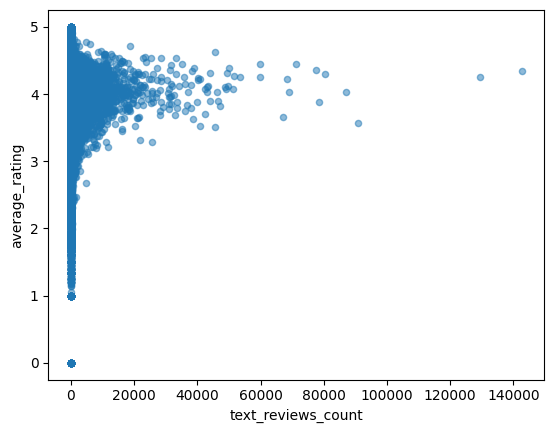

In [47]:
books_clean.plot(kind='scatter', x='text_reviews_count', y='average_rating', alpha=0.5)

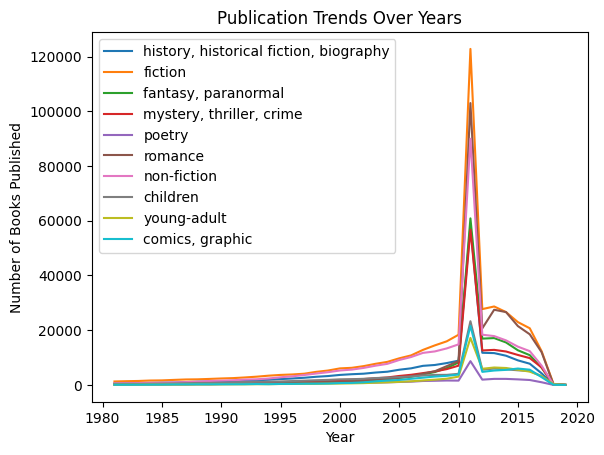

In [76]:
books_before_2020 = books_clean[(books_clean['publication_year'] > 1980) & (books_clean['publication_year'] < 2020)]

books_before_2020.groupby('publication_year')[genre_columns].sum().plot()
plt.title('Publication Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Books Published')
plt.show()

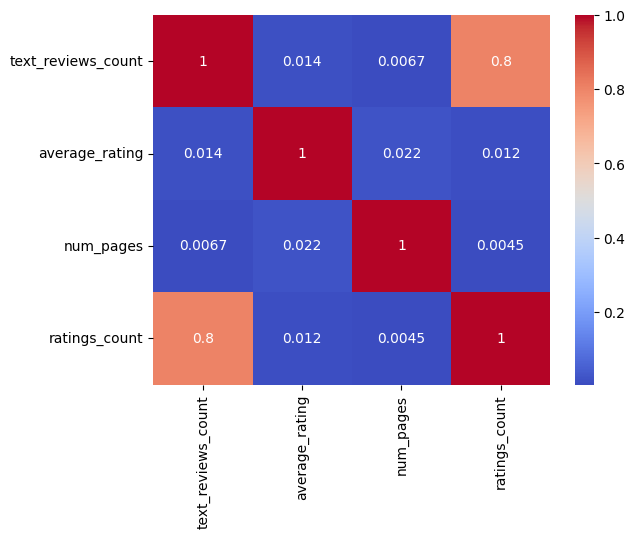

In [55]:
numerical_features = ['text_reviews_count', 'average_rating', 'num_pages', 'ratings_count']
correlation_matrix = books_clean[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

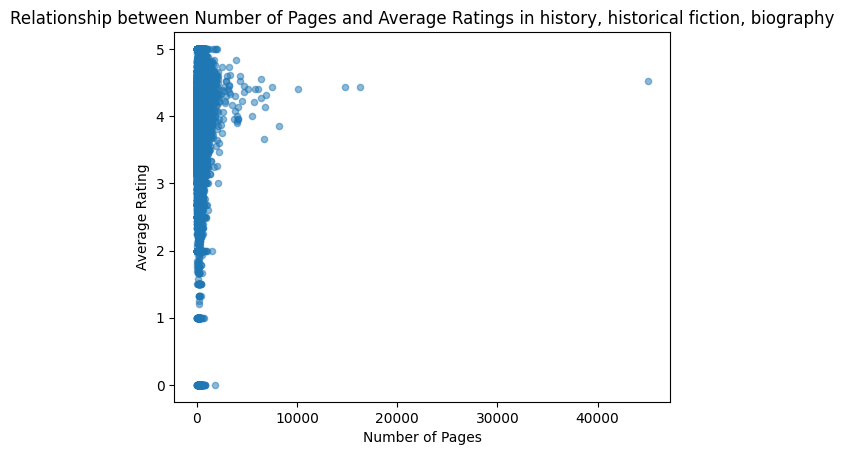

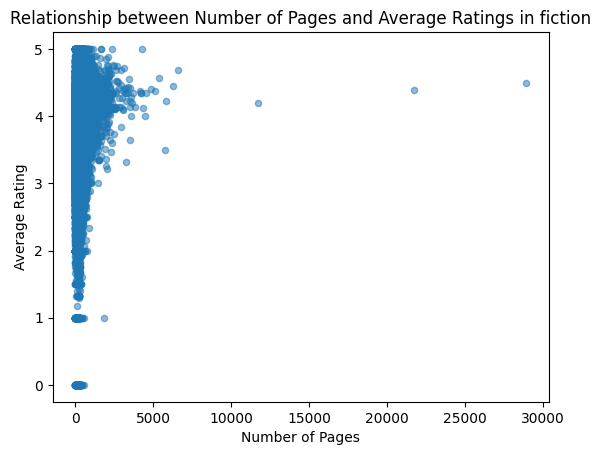

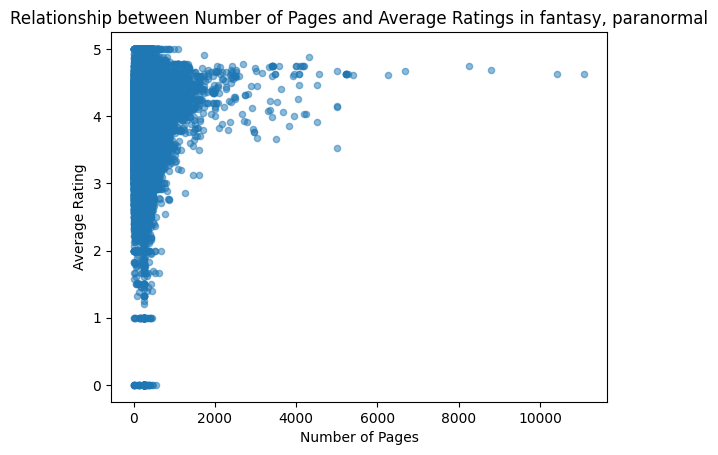

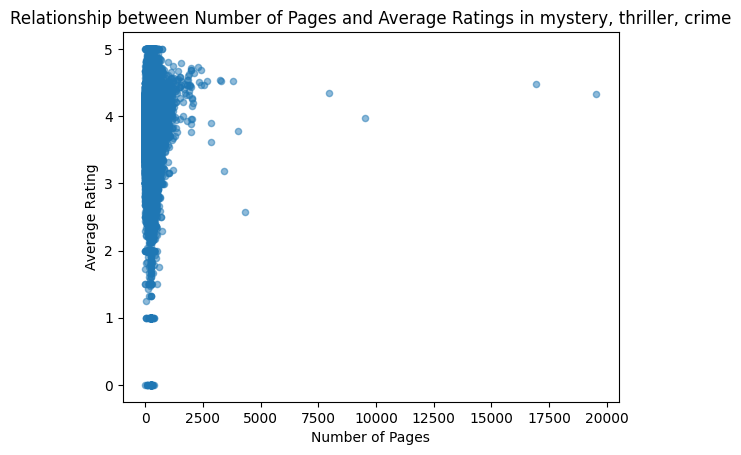

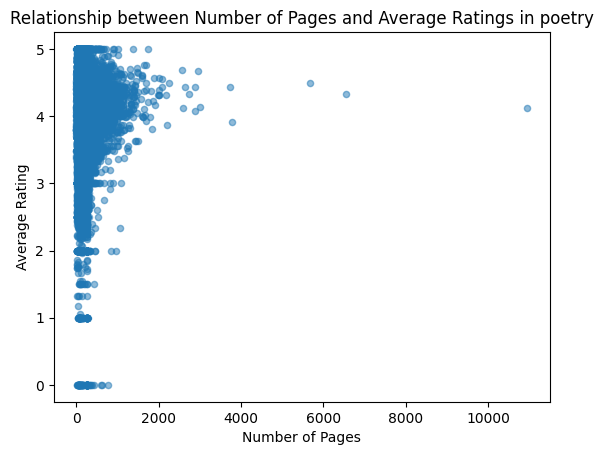

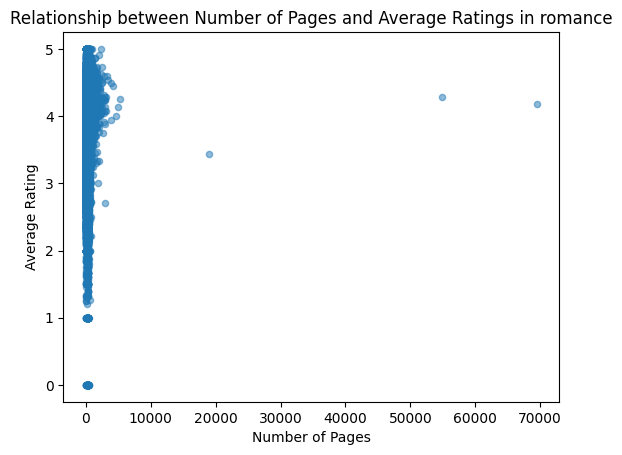

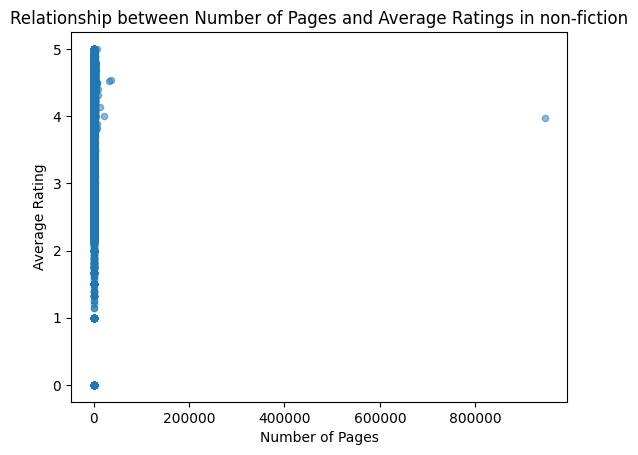

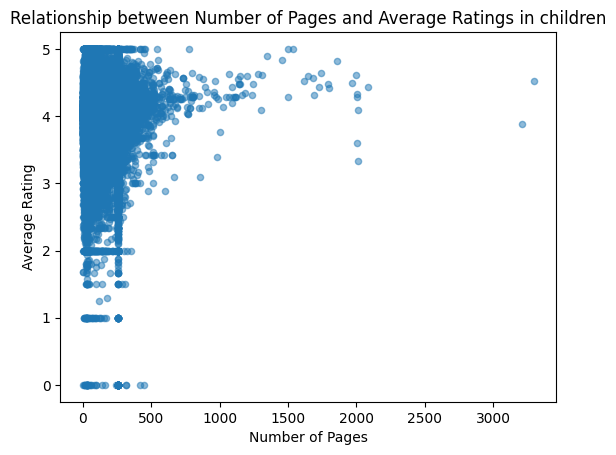

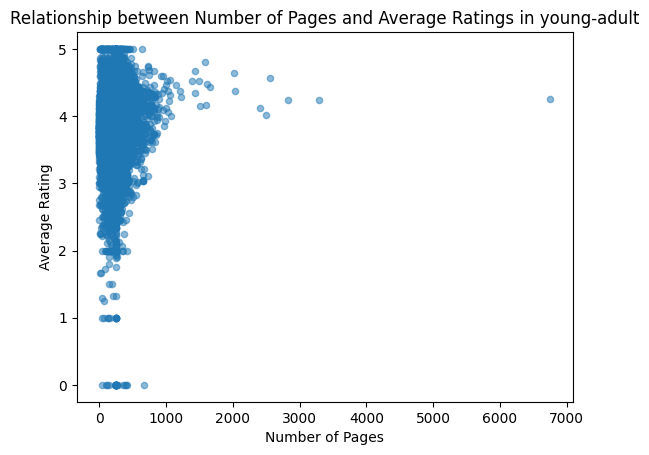

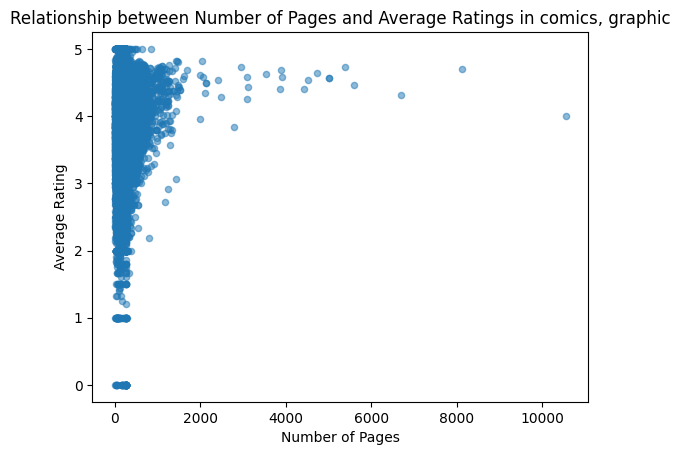

In [56]:
for genre in genre_columns:
    books_clean[books_clean[genre] > 0.5].plot(kind='scatter', x='num_pages', y='average_rating', alpha=0.5)
    plt.title(f'Relationship between Number of Pages and Average Ratings in {genre}')
    plt.xlabel('Number of Pages')
    plt.ylabel('Average Rating')
    plt.show()

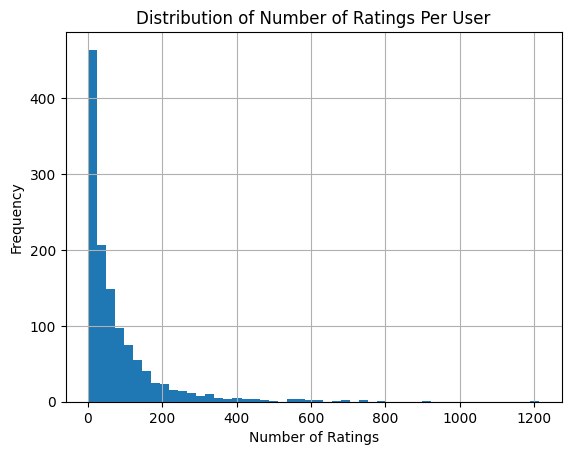

In [89]:
reviews_per_user['review_count'].hist(bins=50)  # You can adjust the number of bins based on your data distribution
plt.title('Distribution of Number of Ratings Per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

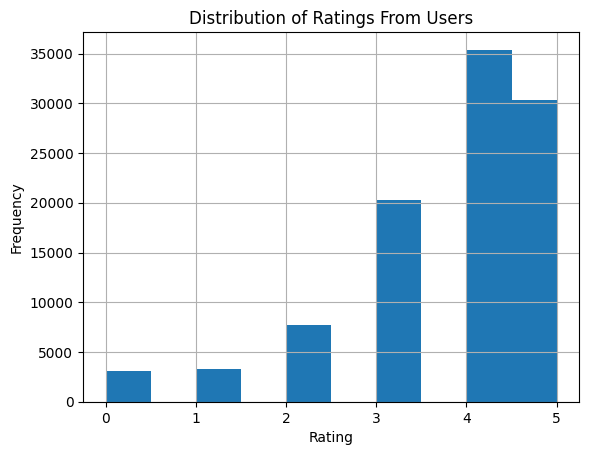

In [101]:
#Can play around with the number of bins 
reviews_chunk['rating'].hist(bins=10) 
plt.title('Distribution of Ratings From Users')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [102]:
books_most_ratings = reviews_chunk.groupby('book_id')['rating'].count()
books_most_ratings = books_most_ratings.reset_index(name='rating_count').sort_values(by='rating_count', ascending=False)
print(books_most_ratings.head(20))

        book_id  rating_count
7974   11870085           201
3914    2767052           152
7605   11235712           144
5433    7260188           139
7876   11735983           131
12834  18007564           125
9059   13335037           113
7038   10194157           112
19463  29056083           110
6603    9460487           108
4548    6148028           108
15775  22557272           107
709       19063           103
10125  15745753           100
2467     256683            99
10816  16068905            99
6137    8490112            98
6947    9969571            98
8960   13206760            93
11117  16143347            92
